**Q1**. Please read WorldCupMatches.csv to a data frame to proceed

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/drive/MyDrive/Data CSC 302/Copy of WorldCupMatches.csv")
print(df)

     Year              Datetime  ... Home Team Initials Away Team Initials
0    1930  13 Jul 1930 - 15:00   ...                FRA                MEX
1    1930  13 Jul 1930 - 15:00   ...                USA                BEL
2    1930  14 Jul 1930 - 12:45   ...                YUG                BRA
3    1930  14 Jul 1930 - 14:50   ...                ROU                PER
4    1930  15 Jul 1930 - 16:00   ...                ARG                FRA
..    ...                   ...  ...                ...                ...
847  2014  05 Jul 2014 - 17:00   ...                NED                CRC
848  2014  08 Jul 2014 - 17:00   ...                BRA                GER
849  2014  09 Jul 2014 - 17:00   ...                NED                ARG
850  2014  12 Jul 2014 - 17:00   ...                BRA                NED
851  2014  13 Jul 2014 - 16:00   ...                GER                ARG

[852 rows x 20 columns]


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Q2** Using seaborn's displot draw density curves to show the distributions of Home Team Goals for every year. 

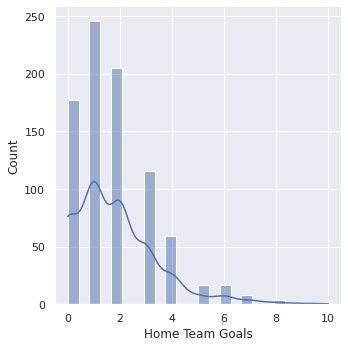

In [4]:
sns.set_theme();
sns.displot(df['Home Team Goals'], kde=True)

**Q3** Draw violin plots to summarize Home Team Goals distributions for each year by using seaborn. Notice that labels are really clutterd. Then please refer to the earlier notebooks to have labels to appear on only select years which end with 0. You can use ax handle to call ax.set_xticklables(labels) for the labels your prepared.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


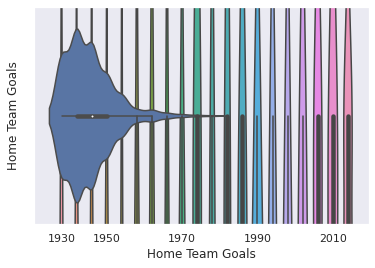

In [5]:
labels=[y if y%5==0 else None for y in list(df.Year.unique())]

ax = sns.violinplot(data=df, x='Year', y='Home Team Goals')
ax.set_xticklabels(labels)
sns.violinplot(df['Home Team Goals'])


**Q4** Please install joypy. Then visualize distributions for Home Team Goals and Away Team Goals' for each year. Once you visualize, please add  plt.style.use('seaborn-white') to see how colors change in your second run. Please also add the legend which you can find from the function prototype.



In [6]:
!pip install joypy

In [18]:
import joypy as jp
plt.style.use('seaborn-white')
jp.joyplot(df, by="Home Team Name", column="Home Team Goals", bins=15, overlap=0, grid=True, legend=True)
jp.joyplot(df, by="Away Team Name", column="Away Team Goals", bins 15, overlap=0, grid=True, legend=True)


#Not sure why this is erroring out, when it works with a single line an the other commented out.

SyntaxError: ignored

**Q5** Please use groupby function on Home Team Initials to see the sum of Home Team Goals which can be saved to another data frame by adding .reset_index() end the end of your line. 

Then use your new data frame to visualize those total Home Team Goals for your top 5 countries (You can use Home Team Initials). You can use use df.sort_values() function on your data frame by tweaking the ascending option.

Notice that your x-axis will be having country initials, and y-axis will show the total number of Home Team Goals. 



(<Figure size 432x288 with 6 Axes>,
  <matplotlib.axes._subplots.AxesSubplot at 0x7fd462b80e10>])

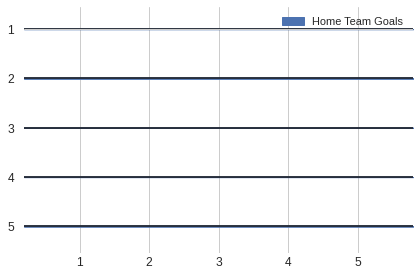

In [12]:
df2 = df.groupby("Home Team Goals").sum().reset_index()

jp.joyplot(data = df2.iloc[1:6], by="Home Team Goals", column="Home Team Goals", bins=15, overlap=0, grid=True, legend=True)
#I do not know if I am doing this right, as my graph does not look correct, and when I try to have it be by Home Team Goals, it errors out, as for some reason that doesn't exist anymore.

**Q6** Please extract the rows for your top 4 countries (Home Team Initials') with the help of the previous question's answer. Then use joyplot again to visualize densities for 'Home Team Goals' and	'Away Team Goals' on the horizantal axis. Notice that your y-axis labels will be your country initials (Home Team Initials'). Make sure that your legend is visible and use 'dark_background' by calling plt.style.use again.



/usr/local/lib/python3.7/dist-packages/joypy/joyplot.py:582: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  fig.tight_layout(h_pad=h_pad)


(<Figure size 432x288 with 5 Axes>,
  <matplotlib.axes._subplots.AxesSubplot at 0x7fd4624f1c90>])

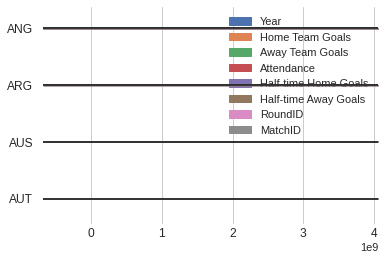

In [21]:
df3 = df.groupby("Home Team Initials").sum().reset_index()
jp.joyplot(data = df3.iloc[1:5], by="Home Team Initials", bins=15, overlap=0, grid=True, legend=True)

**Q7** Please install seaborn_qqplot as shown below. Then draw a qqplot to compare probability distributions of Home Team Goals and Away Team Goals. Please comment on your finding. Do you think their distributions agree with each other? Please justify your answer by explaining the figure you obtained.

In [22]:
!pip install seaborn_qqplot

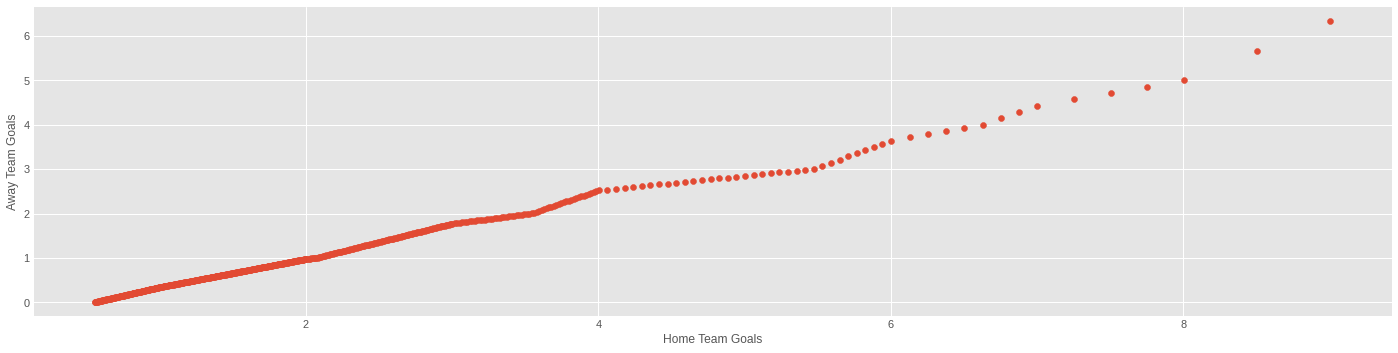

In [25]:
from seaborn_qqplot import pplot #seaborn-qqplot is a seaborn extension adding qqplots.
plt.style.use('ggplot') #this is to change the color theme. 

pplot(df, x="Home Team Goals", y="Away Team Goals", kind='qq', height=5, aspect=4)
#From what I can tell the numbers are extreamly asscued lower down to 0,1 as upon zooming out it is hard to see there is any gaps anywhere in the graph.